# Evaluación de Compras en Videojuegos en Steam: Metacritic vs Steam
### Integrantes:
- Vicente Alarcón 21.177.605-6
- Matías Fontecilla 21.729.131-2

### Resumen ejecutivo del proyecto:

En el entorno actual, los videojuegos se han convertido en productos altamente comercializados, generando un interés significativo en la crítica especializada. Este proyecto se centra en la evaluación de la confiabilidad de las reseñas de videojuegos en Metacritic, una plataforma líder en este campo. Nos proponemos abordar preguntas esenciales: ¿Son las puntuaciones de Metacritic un indicador fiable de la calidad de un videojuego? ¿Existe una relación entre las puntuaciones de Metacritic y las ganancias del juego? ¿Las opiniones de los usuarios en Steam coinciden con las calificaciones de Metacritic?

Para abordar estas interrogantes, analizaremos datos de Steam que incluyen información sobre las puntuaciones de Metacritic, las valoraciones de los usuarios en Steam, los precios de los juegos y las estimaciones de ventas. A través de este análisis, buscamos obtener una comprensión profunda de la percepción de la calidad de los videojuegos por parte de la comunidad de usuarios de Steam y determinar si esta concuerda con las evaluaciones de una plataforma especializada como Metacritic.

### Objetivo General:

Evaluar la confiabilidad y la consistencia de las reseñas de videojuegos en Metacritic y Steam para comprender la influencia de Metacritic en la toma de decisiones de compra de un juego.



### Objetivos Específicos:

- Analizar los datos para crear un gráfico que muestra la correlación entre los puntajes de Metacritic y la venta de los videojuegos.

- Analizar los datos para crear un gráfico que muestra la correlación entre los puntajes de Steam y la venta de los videojuegos.


## Procedimiento:

Importa las librerias necesarias para el proyecto

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize




Se tiene un dataset con respecto a todos los juegos en la plataforma Steam, el cual contiene las siguientes columnas:

| Variable                   | Significado                                                                                                                                                                                                                  |
|----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| App ID | Identificador del videojuego en Steam. |
| Name | Nombre del videojuego. |
| Release date | Fecha de lanzamiento del videojuego. |
| Estimated owners | Número estimado de propietarios del videojuego. |
| Peak CCU | Pico de usuarios concurrentes. |
| Required age | Edad requerida para jugar el videojuego. |
| Price | Precio del videojuego. |
| DLC count | Cantidad de contenido descargable disponible. |
| About the game | Descripción del videojuego. |
| Supported languages | Idiomas soportados por el videojuego. |
| Full audio languages | Idiomas con soporte de audio completo. |
| Reviews | Reseñas y calificaciones del videojuego. |
| Header image | Imagen de encabezado del videojuego. |
| Website | Sitio web del videojuego. |
| Support url | URL de soporte técnico. |
| Support email | Correo electrónico de soporte técnico. |
| Windows | Compatibilidad con el sistema operativo Windows. |
| Mac | Compatibilidad con el sistema operativo Mac. |
| Linux | Compatibilidad con el sistema operativo Linux. |
| Metacritic score | Puntuación del videojuego en Metacritic. |
| Metacritic url | URL de la página del videojuego en Metacritic. |
| User score | Puntuación de los usuarios para el videojuego. |
| Positive | Número de comentarios positivos del videojuego. |
| Negative | Número de comentarios negativos del videojuego. |
| Score rank | Rango de puntuación del videojuego. |
| Achievements | Logros disponibles en el videojuego. |
| Recommendations | Recomendaciones del videojuego. |
| Notes | Notas adicionales sobre el videojuego. |
| Average playtime forever | Tiempo promedio de juego en total. |
| Average playtime two weeks | Tiempo promedio de juego en las últimas dos semanas. |
| Median playtime forever | Tiempo mediano de juego en total. |
| Median playtime two weeks | Tiempo mediano de juego en las últimas dos semanas. |
| Developers | Desarrolladores del videojuego. |
| Publishers | Editores del videojuego. |
| Categories | Categorías a las que pertenece el videojuego. |
| Genres | Géneros a los que pertenece el videojuego. |
| Tags | Etiquetas asociadas al videojuego. |
| Screenshots | Capturas de pantalla del videojuego. |
| Movies | Videos promocionales o de juego del videojuego. |
| Year | Año de lanzamiento del videojuego. |
| Reviewer rating | Valoración de usuarios en metacritic | 
| Positive ratio | Proporción de comentarios positivos en metacritic|


# Limpieza de datos

Este código realiza los pasos iniciales de carga y preprocesamiento de datos:

1. Lee el archivo 'games.csv' en un DataFrame de pandas. Cada fila en el DataFrame representa un juego, y cada columna representa una característica del juego.

2. Lee el archivo 'dataset.csv' en un DataFrame de pandas. Y lo combina con el DataFrame anterior, para tener un DataFrame con todos los datos.

3. Define una lista de nombres de columnas que queremos excluir de nuestro DataFrame. Estas columnas no son necesarias para nuestro análisis.

4. Elimina las columnas listadas en la lista `exclude` del DataFrame. El DataFrame resultante, `games_crop`, contiene solo las columnas en las que estamos interesados para nuestro análisis.

5. Se reducen la cantidad de intervalos de la columna `estimated_owners` para reducir el número de categorías y facilitar el análisis.




In [2]:
games_df = pd.read_csv('games.csv')
# Lee el nuevo archivo CSV
additional_data_df = pd.read_csv('dataset.csv')

# id' en 'dataset.csv' corresponde con 'AppID' en 'games.csv'
# # Combina ambos conjuntos de datos utilizando la columna 'AppID' como clave
merged_df = pd.merge(games_df, additional_data_df[['id', 'year', 'reviewer_rating','positivity_ratio']], left_on='AppID', right_on='id', how='left')

# Llena los valores nulos en las columnas relevantes con cero
merged_df['year'] = merged_df['year'].fillna(0)
merged_df['reviewer_rating'] = merged_df['reviewer_rating'].fillna(0)

merged_df['positivity_ratio'] = merged_df['positivity_ratio'].fillna(0)


# Eliminar las columnas 'id' y 'AppID', no se necesitan
merged_df = merged_df.drop(['id', 'AppID'], axis=1)

exclude = ['Name', 'Release date', 'About the game', 'Publishers','DLC count','Achievements', 'Supported languages','Header image', 'Website','Categories', 'Tags','Support url', 'Developers', 'Support email', 'Metacritic url', 'Notes',  'Genres', 'Screenshots', 'Movies',  'Reviews', 'Full audio languages', 'User score',  'Movies',  'Score rank', 'Windows']
games_crop = merged_df.drop(exclude, axis=1)

# Agrupa los valores de la columna 'Estimated owners' en rangos nuevos
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('0 - 0', '0 - 20000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('20000 - 50000', '20000 - 100000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('50000 - 100000', '20000 - 100000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('100000 - 200000', '100000 - 2000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('200000 - 500000', '100000 - 2000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('500000 - 1000000', '100000 - 2000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('500000 - 1000000', '100000 - 2000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('1000000 - 2000000', '100000 - 2000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('10000000 - 20000000', '10000000 - 200000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('20000000 - 50000000', '10000000 - 200000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('50000000 - 100000000', '10000000 - 200000000')
games_crop['Estimated owners'] = games_crop['Estimated owners'].replace('100000000 - 200000000', '10000000 - 200000000')


Se realiza la codificación de etiquetas en la columna 'Estimated owners' del DataFrame `games_crop` y luego elimina esa columna del DataFrame. Aquí está el desglose paso a paso:

1. Crea una instancia de la clase `LabelEncoder` del módulo sklearn.preprocessing. LabelEncoder se utiliza para transformar etiquetas no numéricas a etiquetas numéricas.

2. Aplica el codificador de etiquetas a la columna 'Estimated owners' del DataFrame `games_crop`. El método `fit_transform` ajusta el codificador de etiquetas y devuelve las etiquetas codificadas.

3. Convierte la columna 'Estimated owners' (que ahora está codificada con etiquetas) a una lista y la almacena en la variable `estimated_owners_list`.

4. Elimina la columna 'Estimated owners' del DataFrame `games_crop`. El parámetro `inplace=True` significa que la operación se realiza en el lugar en el DataFrame y devolverá None.

In [3]:
# Inicializa el LabelEncoder
le = LabelEncoder()

# Aplica el LabelEncoder a la columna 'Estimated owners'
games_crop['Estimated owners'] = le.fit_transform(games_crop['Estimated owners'])

# Ordena las clases en función del valor numérico de la parte izquierda de los rangos
class_names = sorted(le.classes_, key=lambda x: int(x.split(' - ')[0]))

# Imprime la lista de clases ordenada
print("Lista de clases ordenada: ", class_names)

# Transforma las etiquetas a representación binaria
y = games_crop['Estimated owners']
y = label_binarize(y, classes=np.arange(len(class_names)))

# Almacena la lista de etiquetas codificadas
estimated_owners_list = games_crop['Estimated owners'].tolist()

# Elimina la columna 'Estimated owners' del DataFrame
games_crop.drop(['Estimated owners'], axis=1, inplace=True)

Lista de clases ordenada:  ['0 - 20000', '20000 - 100000', '100000 - 2000000', '2000000 - 5000000', '5000000 - 10000000', '10000000 - 200000000']


Esta línea de código utiliza la función `train_test_split` del módulo model_selection de sklearn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(games_crop, estimated_owners_list, test_size=0.2, random_state=42)

### Correlacion entre las variables
En este grafico se pueden apreciar que tan linealmente asociadas estan las variables el parametro a estudiar, la cantidad de dueños estimados, de estos se puede apreciar que 'Metacritic Score', que una de las variables a estudiar, es la segunda que mas relacionada esta. De esto se puede concluir que esta variable es importante para el estudio, segun las viaudalizaciontes.

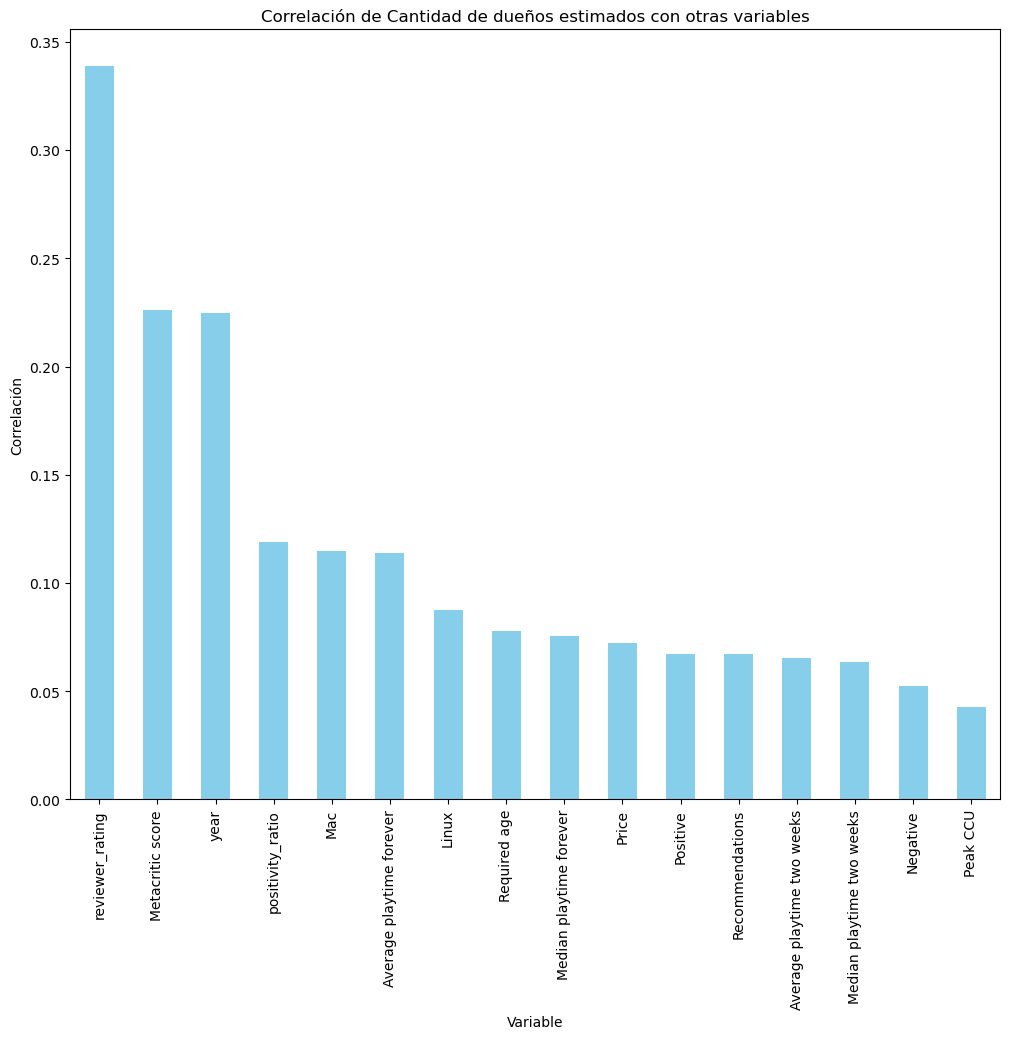

In [5]:
# Crear una copia del DataFrame original
games_crop_numeric = games_crop.copy()
games_crop_numeric['Estimated owners'] = estimated_owners_list

# Inicializar el LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'estimated_owners' con LabelEncoder
games_crop_numeric['Estimated owners'] = le.fit_transform(games_crop_numeric['Estimated owners'])

# Calcular la correlación de 'Estimated owners' con otras variables
correlation_with_owners = games_crop_numeric.corr()['Estimated owners'].sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 10))
correlation_with_owners.drop('Estimated owners').plot(kind='bar', color='skyblue')
plt.title('Correlación de Cantidad de dueños estimados con otras variables')
plt.xlabel('Variable')
plt.ylabel('Correlación')
plt.show()

En este mapa de calor se puede ver que tan linealmente realacionadas estan todas la variables dentro del marco de datos. Podemos visualizar que las variables `Positive`, `Negative` y `Recommendations`, de Steam, estan fuertemente relacionadas, lo que nos indica que estas variables podrían ser útiles para el modelo.

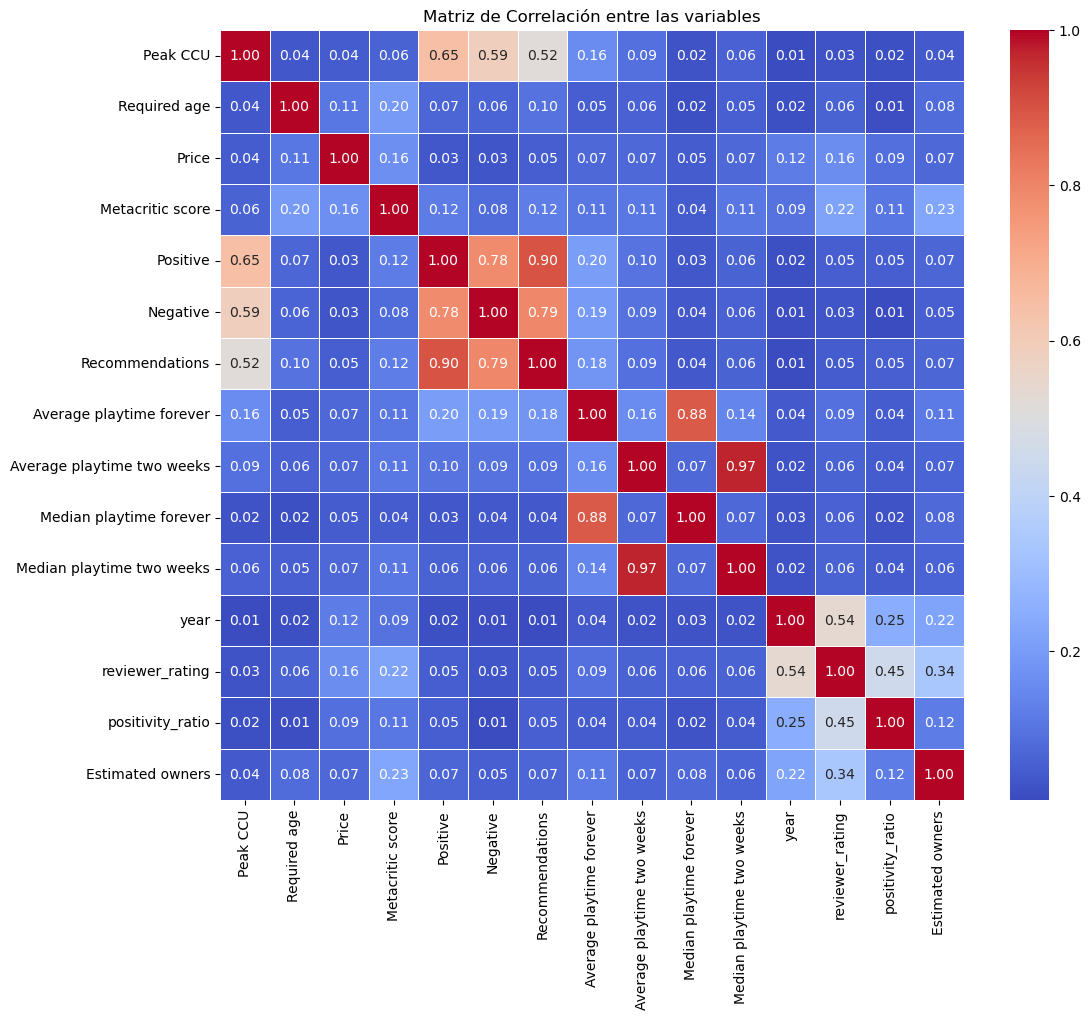

In [6]:
# Crear una copia del DataFrame original
games_crop_numeric = games_crop.copy()
games_crop_numeric['Estimated owners'] = estimated_owners_list #ESTO NO ESTABA ANTES

# Eliminar las columnas no numéricas
games_crop_numeric = games_crop_numeric.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = games_crop_numeric.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre las variables')
plt.show()

## Desarrollo
Lo buscado es obtener un intervalo de cantidad de ventas estimada, asi que, se utilizan modelos clasificadores en los que cada intervalo sería una categoría. 
Se crean y entrenan los modelos a probar clasificador XGB y clasificador Random Forest.

In [7]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='sqrt',bootstrap=False, criterion='entropy')
rf.fit(X_train,y_train)
xgb = XGBClassifier(n_estimators=100, max_depth=10)
xgb.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

Se despliega las metricas para elegir el modelo. De estas metricas la mas relevante para el proyecto es el accuracy, ya que, el objetivo del modelo es predecir correctamente cuantos juegos se venderán a partir de ciertos datos. Podemos visualizar que en este caso, ambos modelos tienen el mismo accuracy, por lo que se elige el modelo Random Forest, ya que, este tiene un mejor tiempo de entrenamiento y predicción.

In [8]:
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print(f"\nRandom Forest Classifier metrics:\nF1 Score: {f1_rf:.2f}\nAccuracy: {accuracy_rf:.2f}\nPrecision: {precision_rf:.2f}\nRecall: {recall_rf:.2f}")

f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost Classifier metrics:\nF1 Score: {f1_xgb:.2f}\nAccuracy: {accuracy_xgb:.2f}\nPrecision: {precision_xgb:.2f}\nRecall: {recall_xgb:.2f}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Imprimir los resultados
print(f"Scores: {scores}")
print(f"Mean score: {scores.mean():.2f}")


Random Forest Classifier metrics:
F1 Score: 0.87
Accuracy: 0.88
Precision: 0.87
Recall: 0.88
XGBoost Classifier metrics:
F1 Score: 0.87
Accuracy: 0.88
Precision: 0.87
Recall: 0.88
Scores: [0.87958323 0.88268512 0.88459397 0.88483258 0.88450525]
Mean score: 0.88


En esta matriz de confusión se puede ver que tan bien predice el modelo, en este caso, se puede ver que el modelo predice bien la mayoría de los datos, pero la mayoría de las predicciones correctas son los juegos que tienen entre `0 - 20000` . En cambio, los juegos que tienen entre `10000000 - 200000000` , es el que más resultados erroneos tiene.

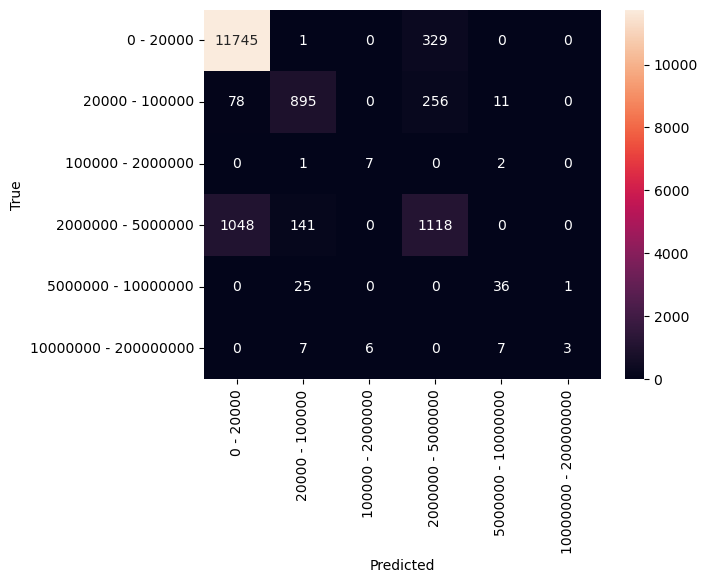

In [9]:
classes = np.unique(np.concatenate((y_test, y_pred_rf)))

cm = confusion_matrix(y_test, y_pred_rf, labels=classes)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 


Despliega una comparación de las predicciones con los valores reales. 

In [10]:
# Obtén las columnas 'Price', 'Metacritic score' y 'Positive' del conjunto de prueba
additional_columns = X_test[['Price', 'Metacritic score', 'Positive']].copy()

# Agrega las columnas al DataFrame predDf
predDf = pd.DataFrame({'Estimated Owners Class': le.inverse_transform(y_test), 'Predicted Class': le.inverse_transform(y_pred_rf)})

# Combina predDf con las columnas adicionales
predDf = pd.concat([additional_columns.reset_index(drop=True),predDf], axis=1)

# Muestra el DataFrame resultante
display(predDf)

,Price,Metacritic score,Positive,Estimated Owners Class,Predicted Class
0,5.99,0,0,0,0
1,0.99,0,0,0,0
2,3.99,0,0,0,0
3,6.99,0,96,0,0
4,0.90,0,4,0,0
...,...,...,...,...,...
15712,9.99,0,0,0,0
15713,0.99,0,2,0,0
15714,1.99,0,2,0,0
15715,3.99,0,41,0,0


Despliega la importancia de las variables en el modelo. La importancia es una característica del modelo de bosque aleatorio que mide la importancia relativa de cada variable de entrada para la salida. Cuanto mayor sea el valor, mayor será la importancia de esa variable de entrada para la salida. Esta información es útil para determinar qué variables de entrada son las más importantes para el modelo.

In [11]:
compareDf = pd.DataFrame(
    {
        'Variables': games_crop.columns,
        'Importancia': rf.feature_importances_
    }
)
compareDf = compareDf.sort_values(by='Importancia', ascending=False)
display(compareDf)

,Variables,Importancia
7,Negative,0.264946
6,Positive,0.242909
11,Median playtime forever,0.121745
9,Average playtime forever,0.108488
8,Recommendations,0.073243
13,year,0.044044
0,Peak CCU,0.034920
2,Price,0.033313
14,reviewer_rating,0.028476
15,positivity_ratio,0.025185


## Observaciones

- Durante la presentación del proyecto, uno de los consejos que dio el profesor Victor Flores, fue reducir el número de clases a clasificar, aumentando el rango de los intervalos. Esto se hizo para mejorar la precisión del modelo, ya que, al tener más clases, el modelo tiene más dificultad para predecir correctamente. Gracias a esto, el modelo actualmente mejoro de un 0.81 a un 0.87 de precisión.

- Esto hizo que la variable más importante para el modelo cambiara, ahora la variable va cambiando entre `Positive` y `Negative`, lo que nos indica que estas variables son importantes para el modelo.


## Conclusiones

- El modelo es capaz de predecir correctamente la cantidad de ventas estimadas de un juego, con un 87% de precisión. Sin embargo, muchas de estas se encuentran en un rango entre `0 - 20000`, lo que indica que muchos juegos tienen pocas ventas, que pueden llegar a afectar la útilidad del modelo.

- Es posible mejorar el modelo utilizando los datos que pueden tener las empresas `Steam` y `Metacritic`.Nuestro modelo trabaja con datos que no son tan precisos, como lo es el `Año`. Estas empresas podrían utilizar la cantidad de ventas en las primeras 24 horas, lo que mejoraría la utilidad del modelo.

- Con respecto a nuestro objetivo general, podemos concluir, que las reseñas positivas y negativas de Steam son las variables más importantes a la hora de comprar un videojuego. Lo que determina, que las reseñas realizadas por los usuarios en Steam, son más importantes que las reseñas realizadas por la crítica especializada en Metacritic.